Make sure the parquet file is send to wandb.

    wandb artifact put \
          --name exercise_4/genres_mod.parquet \
          --type raw_data \
          --description "A modified version of the songs dataset" genres_mod.parquet

In [1]:
import seaborn as sns
import pandas as pd
import wandb
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
run = wandb.init(
  project="exercise_4",
  save_code=True
)

wandb: Currently logged in as: tessavdheiden (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.13.5 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [3]:
artifact = run.use_artifact("exercise_4/genres_mod.parquet:latest")
df = pd.read_parquet(artifact.file())
df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5       NaN     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo            type  duration_ms  \
0          0.013400    0.0556   0.3890  156.985  audio_features       124539   
1          0.000000    0.1180   0.1240  115.080  audio_features       224427   
2          0.000004    0.3720   0.0391  218.050  audio_features        98821   
3          0.000000    0.1140   0.1750  186.948  audio_features       123661   
4          0.000000    0.1660   0.5910  147.988  audio_features       123298   

   time_signature      genre                                      song_name  \
0               4  Dark Trap                            Mercury: Retrograde   
1               4  Dark Trap                                      Pathology   
2               4  Dark Trap                                       Symbiote   
3               3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4               4  Dark Trap                                          Venom   

  title  
0  None  
1  None  
2  None  
3  None  
4  None

In [4]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True) 

In [5]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df = df.drop_duplicates().reset_index(drop=True)

In [7]:
df['title'].fillna(value='', inplace=True)
df['song_name'].fillna(value='', inplace=True)
df['text_feature'] = df['title'] + ' ' + df['song_name']

In [8]:
df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5       NaN     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo            type  duration_ms  \
0          0.013400    0.0556   0.3890  156.985  audio_features       124539   
1          0.000000    0.1180   0.1240  115.080  audio_features       224427   
2          0.000004    0.3720   0.0391  218.050  audio_features        98821   
3          0.000000    0.1140   0.1750  186.948  audio_features       123661   
4          0.000000    0.1660   0.5910  147.988  audio_features       123298   

   time_signature      genre                                      song_name  \
0               4  Dark Trap                            Mercury: Retrograde   
1               4  Dark Trap                                      Pathology   
2               4  Dark Trap                                       Symbiote   
3               3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4               4  Dark Trap                                          Venom   

  title                                    text_feature  
0                                   Mercury: Retrograde  
1                                             Pathology  
2                                              Symbiote  
3         ProductOfDrugs (Prod. The Virus and Antidote)  
4                                                 Venom

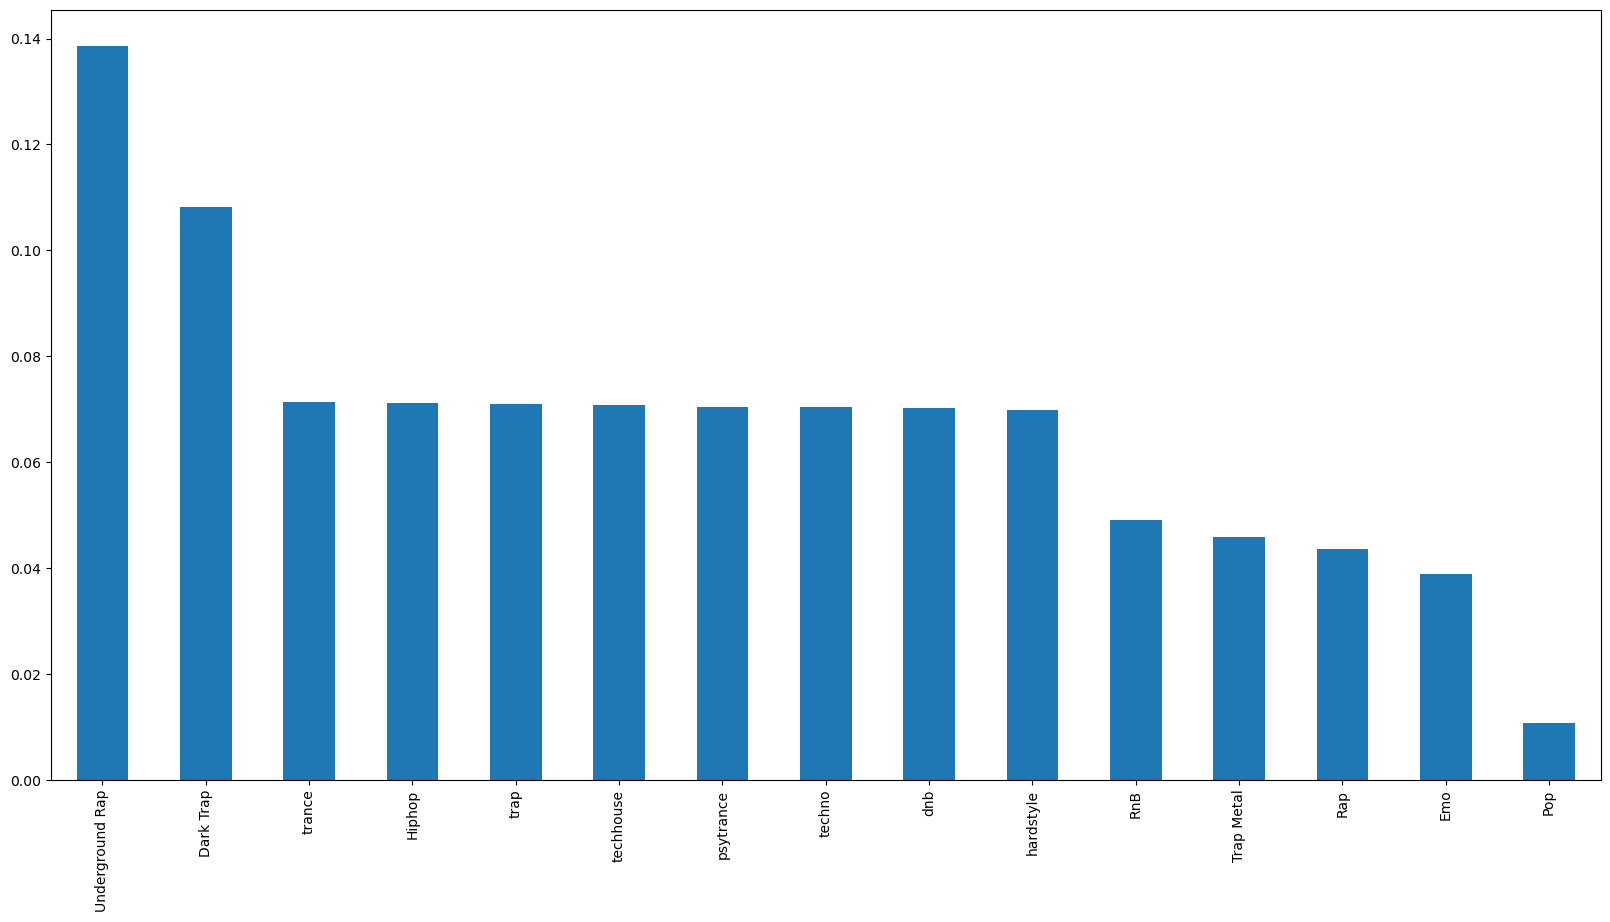

In [9]:
plt.figure(figsize=(20,10)) 
df['genre'].value_counts('normalize').plot(kind='bar');

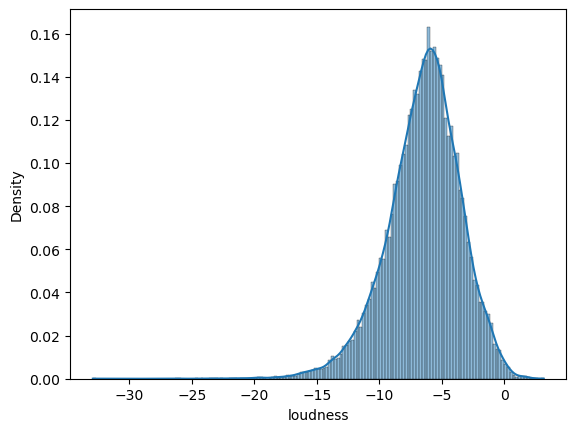

In [10]:
sns.histplot(df['loudness'], stat='density', kde=True);

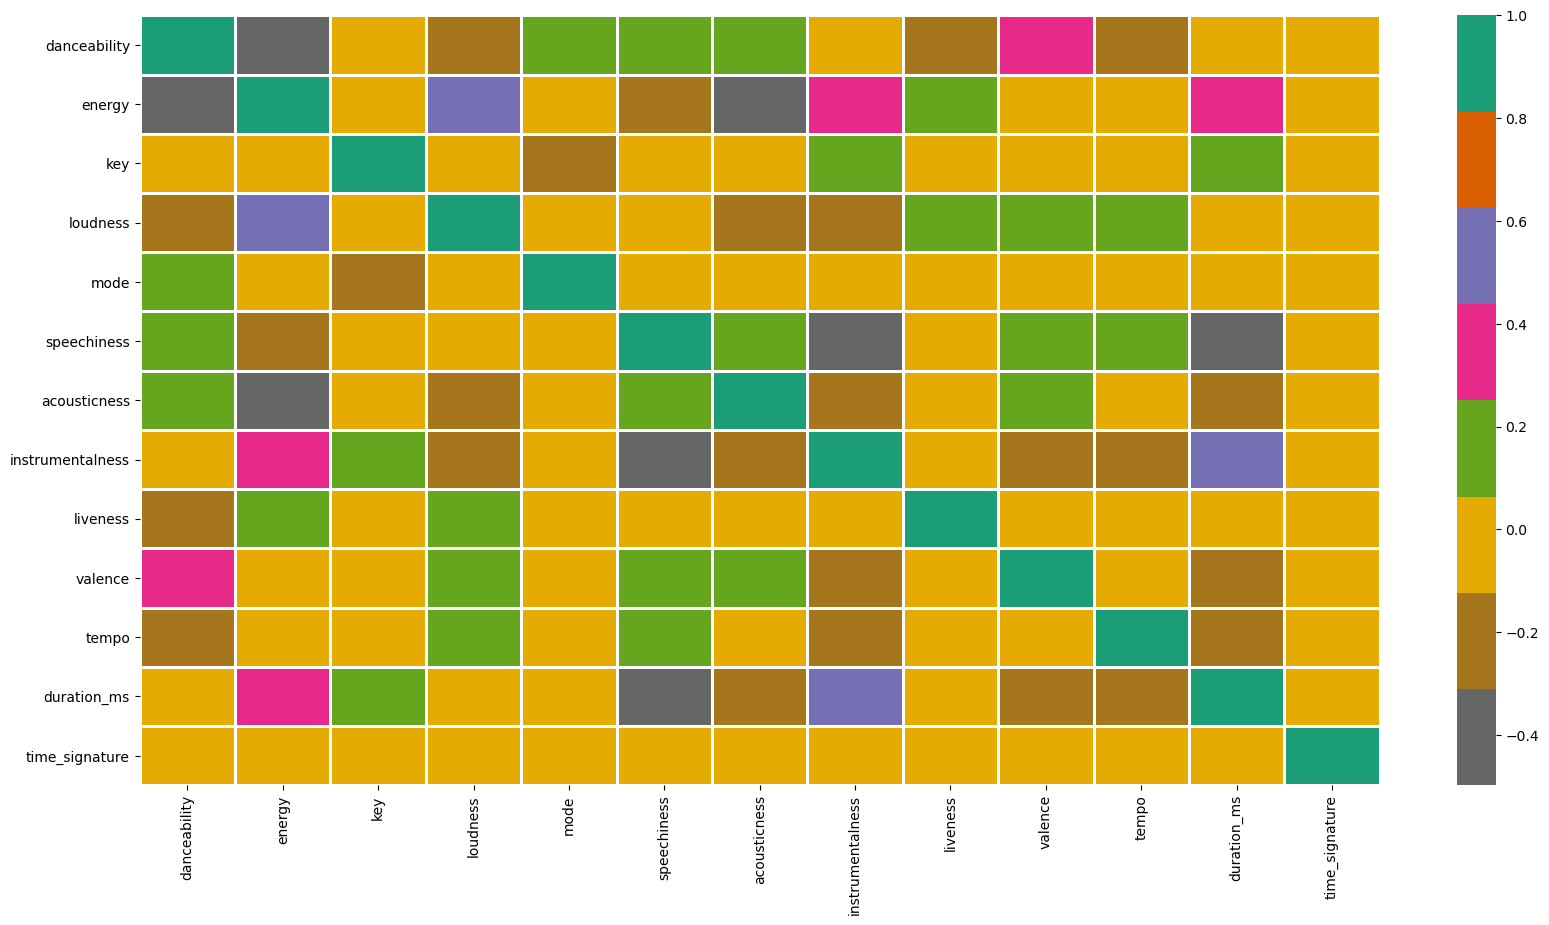

In [11]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=False, cmap='Dark2_r', linewidths = 2)
plt.show()

In [12]:
run.finish()

Problem finishing run
Traceback (most recent call last):
  File "/Users/tessavanderheiden/miniconda3/envs/mlflow-f66d3b9ed964bf9c78ca62cb1d62c5209f2c9938/lib/python3.9/site-packages/wandb/sdk/wandb_run.py", line 1454, in _atexit_cleanup
    self._on_finish()
  File "/Users/tessavanderheiden/miniconda3/envs/mlflow-f66d3b9ed964bf9c78ca62cb1d62c5209f2c9938/lib/python3.9/site-packages/wandb/sdk/wandb_run.py", line 1619, in _on_finish
    self._poll_exit_response = self._wait_for_finish()
  File "/Users/tessavanderheiden/miniconda3/envs/mlflow-f66d3b9ed964bf9c78ca62cb1d62c5209f2c9938/lib/python3.9/site-packages/wandb/sdk/wandb_run.py", line 1574, in _wait_for_finish
    self._on_finish_progress(pusher_stats, done)
  File "/Users/tessavanderheiden/miniconda3/envs/mlflow-f66d3b9ed964bf9c78ca62cb1d62c5209f2c9938/lib/python3.9/site-packages/wandb/sdk/wandb_run.py", line 1562, in _on_finish_progress
    self._pusher_print_status(progress, done=done)
  File "/Users/tessavanderheiden/miniconda3/en